# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Identify the input features that play a role in determining the 'price' of a car. Identify the  respective coefficients/contributions to the output variable 'price' for all the input parameters and their combinations.   

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import pandas_profiling as df_report 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import math
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,PolynomialFeatures, OrdinalEncoder
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

df = pd.read_csv('data/vehicles.csv')
display(df.head(5))
display(df.describe())
display(df.info())
df_report.ProfileReport(df)


<ipython-input-1-d0120d70504d>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as df_report


id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

None

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

ydata_profiling was a really useful library that produced an intereactive output. I am planning to use the insights from the ooutpput of ydata-profiling to start my initial round of data cleanups. Starting with outlier filters for numeric values and one hot encoding for categorical variabes and ordinal encoding for categogical variables that show some sorta order in the values. 

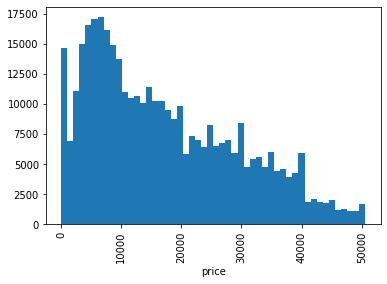

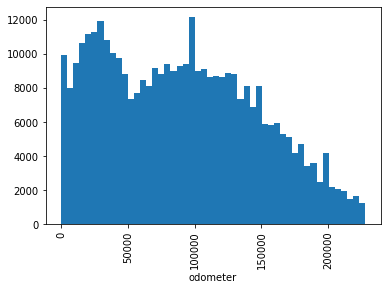

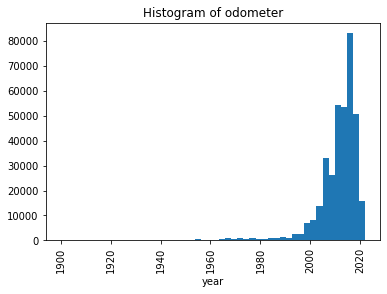

<AxesSubplot:xlabel='year', ylabel='price'>

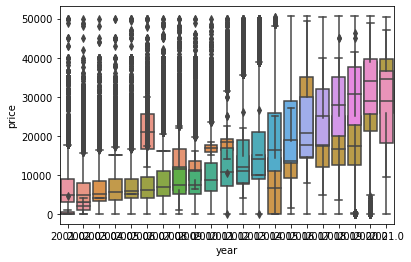

In [2]:
# Cleanup and looking at numerical columns
# Filtering out the lower 1 percentile and higher 1 percentile values from each price and odometer to remove some potential outliers
import seaborn as sns


df = df[(df['price']>df.price.quantile(0.01)) & (df['price'] < df.price.quantile(0.97))]
plt.figure(1)
plt.hist(df['price'],bins=50,label='Histogram of price')
plt.xlabel('price')
plt.xticks(rotation = 90)
plt.show()

df = df[ (df['odometer']<df.odometer.quantile(0.97)) & (df['odometer']>df.odometer.quantile(0.01)) ]
plt.figure(2)
plt.hist(df['odometer'],bins=50,label='Histogram of odometer')
plt.xlabel('odometer')
plt.xticks(rotation = 90)
plt.show()

#df = df[df['year']>df.year.quantile(0.01) ]
plt.figure(3)
plt.hist(df['year'],bins=50,label='Histogram of odometer')
plt.title('Histogram of odometer')
plt.xlabel('year')
plt.xticks(rotation = 90)
plt.show()
#df = df[ (df['odometer']<df.odometer.quantile(0.99)) & (df['odometer']>df.odometer.quantile(0.01)) ]
sns.boxplot(data=df,x='year',y='price')
# after looking at the box plot, decided to remove data for year 2022 as well

df = df[(df['year']<2022) & (df['year']>2000)]

sns.boxplot(data=df,x='year',y='price')

Based on the  output of ydata-profiling, decided to handle na values in each column (as seen in the output of ydata_profiling) as described below, 
Decided to drop records with na for columns year, manufacturer map na to unknown, condition nas to unknown, cylinder nas to unknown 
fuel drop nas (lower percentage of nas),  odometer drop nas (lower percentage of nas) , title status map missing to unknown
transmission drop missing, VIN drop the VIN columns , drive -  nas to unknown , size -  nas to unknown,
type map missing to unknown (candidate to drop) ,paint_color drop column, state - high cardinality may be replace with somethign else


Intutively, manufacturer and model seems would be related to price, but due to high cardinality in this data, 
wanted to understand the frequncy of each categories in the dataset




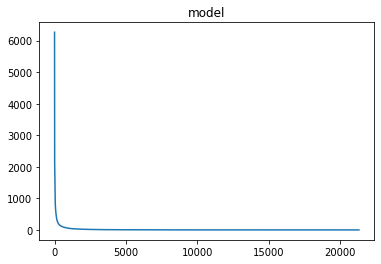

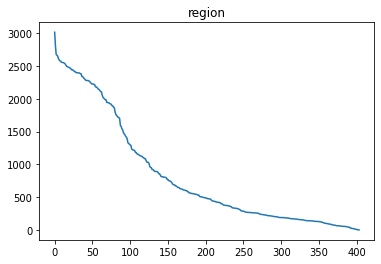

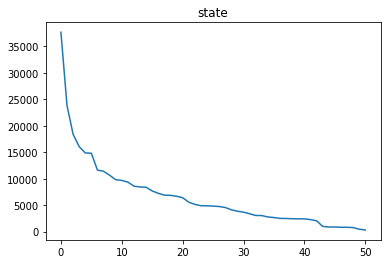

In [3]:
for el in ['model','region','state']:
    plt.figure(el)
    cat = df[el].value_counts()
    plt.plot(range(len(cat)), cat)
    plt.title(el)
    df[el] = df[el].apply(lambda x: x if str(x) in cat[:50] else 'other')


# decided to encode categorical variables of high vardinality with fewer numeric values based on density. 
# My choices were the following
# manufacturer code only top 10, everything else map to 'other'
# model take the top 50 models and map the rest to other,
# just wanted to show an attempt I did to still bring in high cardinality features. 
# But in the end decided to drop these features

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

After looking at the data thoroughly, this is what I decided to do.filter out for price 0.01 - 0.999 quantile for price,  drop na for columns year, map nas in manufacturer to unknown, condition missing to unknown, cylynder missing to unknown 
1. 'fuel' drop nas,  
2. 'odometer' drop nas and filter out for really high values >99th percentile and low values < 1 percentile
3. 'title' status map nas to unknown, transmission drop missing (since it's just a few),
4. 'state' - high cardinality, drop for now
5. 'condition' - map missing values to 'missing'

columns decided to be dropped due to the higher % of nulls/missing values and unique values and or high cardinality
 variables = ['id','vin','paint_color','region','size']

In [4]:
df.drop(columns=['VIN','id','paint_color','region','size','model'],inplace=True)
display(df.columns)

# Mapping missing values to the most frequent values in the categorical columns for each
df_cleaned =  df.fillna(value={'size':'Other','paint_color':'Other Values (2)','title_status':df.title_status.value_counts().index[0],'condition':df.condition.value_counts().index[0],'transmission':df.transmission.value_counts().index[0],'fuel':df.fuel.value_counts().index[0],'manufacturer':df.manufacturer.value_counts().index[0],'state':df.state.value_counts().index[0],'type':df.type.value_counts().index[0],'drive':df.drive.value_counts().index[0],'cylinders':df.cylinders.value_counts().index[0]})

display(df_cleaned.info())
#Then wanted to drop all na, afte rdoing the proper handling of nas
print('Length before dropping all nas {}'.format(len(df_cleaned)))
df_cleaned.dropna(inplace=True)
print('Length after dropping all nas {}'.format(len(df_cleaned)))

# Wanted to convert year into years old assuming 2022 as the starting year
df_cleaned['years_old'] = 2022 - df_cleaned['year']
# 'type' , 'state'

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type', 'state'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338994 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         338994 non-null  int64  
 1   year          338994 non-null  float64
 2   manufacturer  338994 non-null  object 
 3   condition     338994 non-null  object 
 4   cylinders     338994 non-null  object 
 5   fuel          338994 non-null  object 
 6   odometer      338994 non-null  float64
 7   title_status  338994 non-null  object 
 8   transmission  338994 non-null  object 
 9   drive         338994 non-null  object 
 10  type          338994 non-null  object 
 11  state         338994 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 41.7+ MB


None

Length before dropping all nas 338994
Length after dropping all nas 338994


price manufacturer  condition    cylinders fuel  odometer title_status  \
27  33590          gmc       good  8 cylinders  gas   57923.0        clean   
28  22590    chevrolet       good  8 cylinders  gas   71229.0        clean   
29  39590    chevrolet       good  8 cylinders  gas   19160.0        clean   
30  30990       toyota       good  8 cylinders  gas   41124.0        clean   
31  15000         ford  excellent  6 cylinders  gas  128000.0        clean   

   transmission drive    type state  years_old  
27        other   4wd  pickup    al        8.0  
28        other   4wd  pickup    al       12.0  
29        other   4wd  pickup    al        2.0  
30        other   4wd  pickup    al        5.0  
31    automatic   rwd   truck    al        9.0

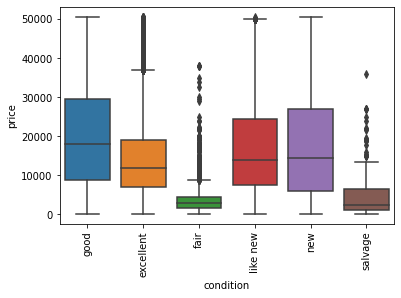

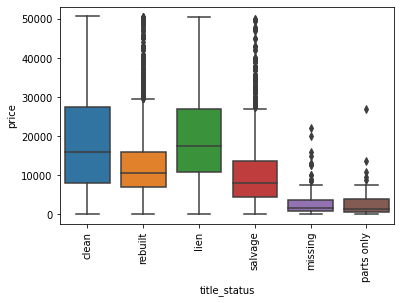

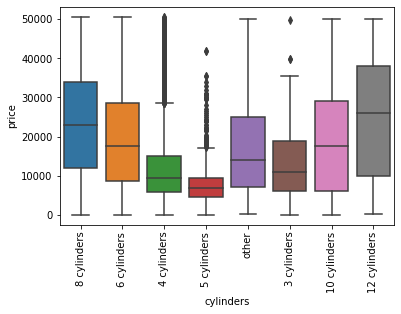

In [5]:
# Dropping year after translating year into years old 
df_cleaned.drop(columns=['year'],inplace=True)

# Now the data is ready to be prepped to be fed into the model 
# using column trasnformers for categorical encoding and applying 
# stadard scalar for numeric values and bake into a pipeline

display(df_cleaned.head())


# Now I want to take a look at the ordinal categorical variables
# ['condition','title_status','cylinder'] and their relationship to price to find out the orders in the categorical variable

for el in ['condition','title_status','cylinders']:
    plt.figure(el)
    sns.boxplot(x=df_cleaned[el],y=df_cleaned['price'])
    plt.xticks(rotation=90)

# decided to drop cylinders after seeing the relationship





In [6]:
df_cleaned.drop(columns='cylinders',inplace=True)

# Building collumns transformations both numeric and categorical columns
# 
numeric_features = ['odometer','years_old']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median',)),
    ('polynomial_features',PolynomialFeatures(2)),
    ('scaler', StandardScaler())])

categorical_ohe_features = ['manufacturer','fuel','transmission','state','type','drive']
categorical_ohe_transformer = OneHotEncoder(handle_unknown='ignore')
categorical_ordinal_features = ['condition','title_status']
ord_condition = [['salvage','fair','good', 'excellent', 'like new', 'new']]
ord_title_status = [['parts only','missing','salvage','rebuilt','lien','clean']]
# Decided the order based on the box plots of each ordinal categorial features against price 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [7]:
# Hyper parameter range for ridge rigression
ridge_param_dict = {'alpha': np.arange(0.01,1,10)}

feature_preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_ohe_transformer, categorical_ohe_features),
        ('ordinal_categorical_condition',OrdinalEncoder(categories=ord_condition), ['condition']),
        ('ordinal_categorical_title_status',OrdinalEncoder(categories=ord_title_status), ['title_status']),
#        ('ordinal_categorical_cylinder_vals',OrdinalEncoder(categories=ord_cylinder_vals), ['cylinders'])
    ])

 # Tested for different cv folds and decided the default 5 fold works fine in this case
 # Starting with a ridge regressor, applied to the trasnsformed columns for numerical and categoricl features 
 # with 20% of data kept aside for final validation (test model performance of data the model have never seen before) 



X = df_cleaned.loc[:,df_cleaned.columns != 'price']
y = df_cleaned.price

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20, random_state=22)


In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

Regressors  = [Ridge(fit_intercept=False),
                Lasso(fit_intercept=False,tol=0.1),
                LinearRegression(fit_intercept=False)]

ridge_parameters = {'alpha':[0.0,0.01,1,2,5,10]} 
lasso_parameters = {'alpha':np.logspace(-10,10,10)}
linear_regression_params = {}

parameters = [
 ridge_parameters,
 lasso_parameters,
 linear_regression_params
 ]

model_pipes=[]
for i,reg in enumerate(Regressors):

    Pipe =  Pipeline(steps=[ ('preprocessor', feature_preprocessor),
                                                ('estimator_', GridSearchCV(
                                                    reg,
                                                    param_grid=parameters[i],
                                                    ))])
    Pipe
    Pipe.fit(X_train, y_train)
    print('For Regressor {}'.format(reg.__class__.__name__))
    print('Best Model R2 is {}'.format(Pipe.named_steps['estimator_'].best_score_))    
    print('Best Model MAE is {}'.format(mean_absolute_error(y_test,Pipe.predict(X_test))))
    feature_names = Pipe.named_steps['preprocessor'].get_feature_names_out()
    coefs = Pipe.named_steps['estimator_'].best_estimator_.coef_  
    print('Feature coefficients')  
    display(pd.DataFrame([coefs.T], columns = feature_names, index = ['model']))
    
    model_pipes.append((reg.__class__.__name__,Pipe))     

    

For Regressor Ridge
Best Model R2 is 0.646892504942446
Best Model MAE is 5061.747832292119
Feature coefficients


numeric__1  numeric__odometer  numeric__years_old  numeric__odometer^2  \
model         0.0        -3339.91012        -9370.930326          1369.390889   

       numeric__odometer years_old  numeric__years_old^2  \
model                  -941.938565            4713.98237   

       categorical__manufacturer_acura  categorical__manufacturer_alfa-romeo  \
model                      1574.726391                           2772.572822   

       categorical__manufacturer_aston-martin  categorical__manufacturer_audi  \
model                               69.416355                     3033.808298   

       ...  categorical__type_pickup  categorical__type_sedan  \
model  ...               5437.272514             -1779.743365   

       categorical__type_truck  categorical__type_van  \
model               5194.76446            1069.451151   

       categorical__type_wagon  categorical__drive_4wd  \
model             -1494.311908             5312.592239   

       categorical__drive_fwd  categorical__drive_rwd  \
model             1659.161315             6381.905849   

       ordinal_categorical_condition__condition  \
model                               -423.021261   

       ordinal_categorical_title_status__title_status  
model                                     1872.949699  

[1 rows x 124 columns]

For Regressor Lasso
Best Model R2 is 0.6351192322526739
Best Model MAE is 5196.8808959860535
Feature coefficients


numeric__1  numeric__odometer  numeric__years_old  numeric__odometer^2  \
model         0.0       -5620.172297        -3519.024986          2804.973382   

       numeric__odometer years_old  numeric__years_old^2  \
model                   -610.90699           -623.332839   

       categorical__manufacturer_acura  categorical__manufacturer_alfa-romeo  \
model                     19237.321532                          20904.192576   

       categorical__manufacturer_aston-martin  categorical__manufacturer_audi  \
model                            20006.261159                    20835.058939   

       ...  categorical__type_pickup  categorical__type_sedan  \
model  ...               5196.288432             -2076.119433   

       categorical__type_truck  categorical__type_van  \
model              5077.446126            1119.775218   

       categorical__type_wagon  categorical__drive_4wd  \
model             -1724.117154              864.898255   

       categorical__drive_fwd  categorical__drive_rwd  \
model            -2765.508326             1787.391599   

       ordinal_categorical_condition__condition  \
model                                -72.325329   

       ordinal_categorical_title_status__title_status  
model                                       73.456882  

[1 rows x 124 columns]

For Regressor LinearRegression
Best Model R2 is 0.6469768659704693
Best Model MAE is 5059.972811108428
Feature coefficients


numeric__1  numeric__odometer  numeric__years_old  numeric__odometer^2  \
model         0.0       -3403.709383        -9280.275194          1387.203064   

       numeric__odometer years_old  numeric__years_old^2  \
model                  -896.189974           4611.037905   

       categorical__manufacturer_acura  categorical__manufacturer_alfa-romeo  \
model                      2474.704188                           3436.363549   

       categorical__manufacturer_aston-martin  categorical__manufacturer_audi  \
model                             3890.618073                     3962.694396   

       ...  categorical__type_pickup  categorical__type_sedan  \
model  ...               5300.508502             -1896.047588   

       categorical__type_truck  categorical__type_van  \
model              5116.369429             972.463538   

       categorical__type_wagon  categorical__drive_4wd  \
model             -1601.059585             5042.449047   

       categorical__drive_fwd  categorical__drive_rwd  \
model             1379.029921             6105.042568   

       ordinal_categorical_condition__condition  \
model                               -434.370534   

       ordinal_categorical_title_status__title_status  
model                                     1837.455424  

[1 rows x 124 columns]

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Text(0.5, 0, 'Feature Name')

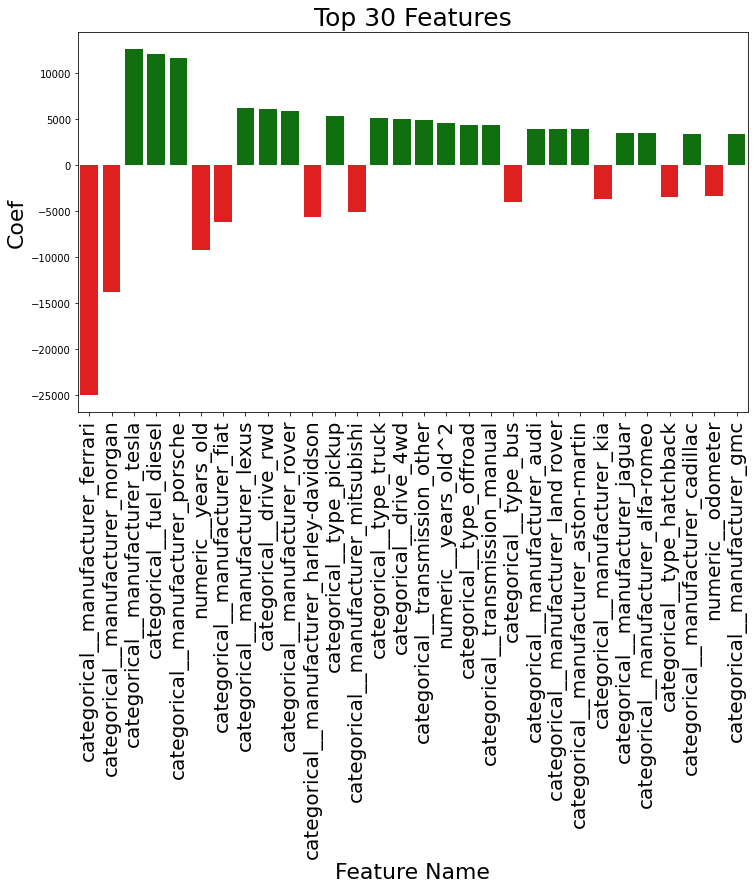

In [23]:
# Looking at the feature contribution from Linear Regression since it produced the lowest Mean Absolute Error

#print(model_pipes[2][1])
best_model=model_pipes[2][1]
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
coefs =best_model.named_steps['estimator_'].best_estimator_.coef_ 
import pandas as pd
# Zip coefficients and names together and make a DataFrame
zipped = zip(feature_names, coefs)
df = pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)

import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(30),
           palette=df.head(30)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 30 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)



Expanded out the range of alpha values, tested out with different fold and scoring mechanisms, all resulted in very similar results. The only thing that majorly improved the results/perfromance of the model was outlier filtering. Creating ordinal categoricl variables didn't really have the effect on the model performance like I hoped. generated polynomials of degree 3 and 4 and realized going up in the order just increases complexity in the ability to explain the relationship of these higher order polynomials to used car sellers and didn't materially improve the model performance as well. 

In [ ]:
# Looking at the contribution of each features

df_feature = feature_relationship.filter(regex='manufacturer')
display(df_feature.sort_values(df_feature.last_valid_index(), axis=1))

df_feature = feature_relationship.filter(regex='type')
display(df_feature.sort_values(df_feature.last_valid_index(), axis=1))

df_feature = feature_relationship.filter(regex='drive')
display(df_feature.sort_values(df_feature.last_valid_index(), axis=1))

df_feature = feature_relationship.filter(regex='state')
display(df_feature.sort_values(df_feature.last_valid_index(), axis=1))


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

After analyzing 300 thousand records of past used car sales from all states within the US with a wide variety of price ranges and involving about 41 different car manufacturers, what I have found out is that the following are the key elements that drive the price of a used car in the US in the order of importance

1. Age of the car in years ( affects price negatiely )
2. Miles travelled by the car (odometer reading) ( affects pricve negatively )
3. Diesel cars have better resale value than gasoline cars
4. The following manufacturer's cars seems to have good resale value given other parameters like age of the car and odometer remains the same,
    Tesla,Porsche, Lexus, Rover, Austin Martin, Land Rover, Audi , Mercedes Benc, Alpha romeo in that order
5. The following  manufacturer's cars seems to have a negative influence on resale value given all other things remain the same,
    Ferrari, organ
6. Manual transmission cars seems to have better resale value than ones without manual trans
7. Pick up trucks , trucks, offroad, onvertibles have better resale value than other car types given everything else remains the same
8. RWD cars seem to have better resale value compared to the others
9. Cars sold in the following state seems to have a positive impact on  resale value 
        MT,AK,UT,VW

    but cars sold in the following state seems to have a negative impact on  resale value
        ME,NH,MA,VT
